## Goals
- Review the features of NumPy and Python that are used in this course
- automate the process of optimizing $w$ and $b$ using gradient descent.

## Tools
In this assignment, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# 1. Python, NumPy and Arrays
A brief introduction to some of the scientific computing used in this course. In particular the NumPy scientific computing package and its use with python.

### Useful References
- NumPy Documentation including a basic introduction: [NumPy.org](https://NumPy.org/doc/stable/)
- A challenging feature topic: [NumPy Broadcasting](https://NumPy.org/doc/stable/user/basics.broadcasting.html)

### Python and NumPy 
Python is the programming language we will be using in this course. It has a set of numeric data types and arithmetic operations. NumPy is a library that extends the base capabilities of python to add a richer data set including more numeric types, vectors, matrices, and many matrix functions. NumPy and python  work together fairly seamlessly. Python arithmetic operators work on NumPy data types and many NumPy functions will accept python data types.

## 1.1 Vectors

<img align="right" src="./images/Vectors.PNG" style="width:340px;" >Vectors, as you will use them in this course, are ordered arrays of numbers. In notation, vectors are denoted with lower case bold letters such as $\mathbf{x}$.  The elements of a vector are all the same type. A vector does not, for example, contain both characters and numbers. The number of elements in the array is often referred to as the *dimension* though mathematicians may prefer *rank*. The vector shown has a dimension of $n$. The elements of a vector can be referenced with an index. In math settings, indexes typically run from 1 to n. In Python, indexing will run from 0 to n-1.  In notation, elements of a vector, when referenced individually will indicate the index in a subscript, for example, the $0^{th}$ element, of the vector $\mathbf{x}$ is $x_0$. Note, the x is not bold in this case.  

### NumPy Arrays

NumPy's basic data structure is an indexable, n-dimensional *array* containing elements of the same type (`dtype`). Right away, you may notice we have overloaded the term 'dimension'. Above, it was the number of elements in the vector, here, dimension refers to the number of indexes of an array. A one-dimensional or 1-D array has one index. In this course, we will represent vectors as NumPy 1-D arrays. 

 - 1-D array, shape (n,): n elements indexed [0] through [n-1]

### Vector Creation

Data creation routines in NumPy will generally have a first parameter which is the shape of the object. This can either be a single value for a 1-D result or a tuple (n,m,...) specifying the shape of the result. Below are examples of creating vectors using these routines.

In [2]:
# NumPy routines which allocate memory and fill arrays with value
a = np.zeros(4);                print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.zeros((4,));             print(f"np.zeros(4,) :  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.random_sample(4); print(f"np.random.random_sample(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4,) :  a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.random.random_sample(4): a = [0.83092983 0.69602711 0.28858699 0.20053764], a shape = (4,), a data type = float64


Some data creation routines do not take a shape tuple:

In [3]:
# NumPy routines which allocate memory and fill arrays with value but do not accept shape as input argument
a = np.arange(4.);              print(f"np.arange(4.):     a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);          print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.arange(4.):     a = [0. 1. 2. 3.], a shape = (4,), a data type = float64
np.random.rand(4): a = [0.36823135 0.41366008 0.30664852 0.41165266], a shape = (4,), a data type = float64


Values can be specified manually as well.

In [4]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([5,4,3,2]);  print(f"np.array([5,4,3,2]):  a = {a},     a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2]); print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.array([5,4,3,2]):  a = [5 4 3 2],     a shape = (4,), a data type = int64
np.array([5.,4,3,2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64


These have all created a one-dimensional vector  `a` with four elements. `a.shape` returns the dimensions. Here we see a.shape = `(4,)` indicating a 1-d array with 4 elements. 


### Opetions on Vectors
Let's explore some operations using vectors.

### 1) Indexing
Elements of vectors can be accessed via indexing and slicing. NumPy provides a very complete set of indexing and slicing capabilities. We will explore only the basics needed for the course here. Reference [Slicing and Indexing](https://NumPy.org/doc/stable/reference/arrays.indexing.html) for more details.  
**Indexing** means referring to *an element* of an array by its position within the array.  
**Slicing** means getting a *subset* of elements from an array based on their indices.  
NumPy starts indexing at zero so the 3rd element of an vector $\mathbf{a}$ is `a[2]`.

In [5]:
#vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

#access an element
print(f"a[2].shape: {a[2].shape} a[2]  = {a[2]}, Accessing an element returns a scalar")

# access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

#indexs must be within the range of the vector or they will produce and error
try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is:")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape: () a[2]  = 2, Accessing an element returns a scalar
a[-1] = 9
The error message you'll see is:
index 10 is out of bounds for axis 0 with size 10


### 2) Slicing
Slicing creates an array of indices using a set of three values (`start:stop:step`). A subset of values is also valid. Its use is best explained by example:

In [6]:
#vector slicing operations
a = np.arange(10)
print(f"a         = {a}")

#access 5 consecutive elements (start:stop:step)
c = a[2:7:1];     print("a[2:7:1] = ", c)

# access 3 elements separated by two 
c = a[2:7:2];     print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:];        print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3];        print("a[:3]    = ", c)

# access all elements
c = a[:];         print("a[:]     = ", c)

a         = [0 1 2 3 4 5 6 7 8 9]
a[2:7:1] =  [2 3 4 5 6]
a[2:7:2] =  [2 4 6]
a[3:]    =  [3 4 5 6 7 8 9]
a[:3]    =  [0 1 2]
a[:]     =  [0 1 2 3 4 5 6 7 8 9]


## 1.2 Matrices

Matrices, are two dimensional arrays. The elements of a matrix are all of the same type. In notation, matrices are denoted with capitol, bold letter such as $\mathbf{X}$. In this and other assignments, `m` is often the number of rows and `n` the number of columns. The elements of a matrix can be referenced with a two dimensional index. In math settings, numbers in the index typically run from 1 to n. In Python, indexing will run from 0 to n-1.  
<figure>
    <center> <img src="./images/Matrices.PNG"  alt='missing'  width=900><center/>
    <figcaption> Generic Matrix Notation, 1st index is row, 2nd is column </figcaption>
<figure/>

### NumPy Arrays

NumPy's basic data structure is an indexable, n-dimensional *array* containing elements of the same type (`dtype`). These were described earlier. Matrices have a two-dimensional (2-D) index [m,n].

In this course, 2-D matrices are used to hold training data. Training data is $m$ examples by $n$ features creating an (m,n) array. This assignment does not do operations directly on matrices but typically extracts an example as a vector and operates on that. Below you will review: 
- data creation
- slicing and indexing

### Matrix Creation
The same functions that created 1-D vectors will create 2-D or n-D arrays. Here are some examples

Below, the shape tuple is provided to achieve a 2-D result. Notice how NumPy uses brackets to denote each dimension. Notice further than NumPy, when printing, will print one row per line.

In [7]:
a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.zeros((2, 1))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (2, 1), a = [[0.]
 [0.]]
a shape = (1, 1), a = [[0.88766285]]


One can also manually specify data. Dimensions are specified with additional brackets matching the format in the printing above.

In [8]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]
 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]


### Operations on Matrices
Let's explore some operations using matrices.

### 1) Indexing

Matrices include a second index. The two indexes describe [row, column]. Access can either return an element or a row/column. See below:

In [9]:
#vector indexing operations on matrices
a = np.arange(6).reshape(-1, 2)   #reshape is a convenient way to create matrices
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:   {a[2, 0].shape}, a[2,0] = {a[2, 0]},     type(a[2,0]) = {type(a[2, 0])} Accessing an element returns a scalar\n")

#access a row
print(f"a[2].shape:   {a[2].shape}, a[2]   = {a[2]}, type(a[2])   = {type(a[2])}")

a.shape: (3, 2), 
a= [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape:   (), a[2,0] = 4,     type(a[2,0]) = <class 'numpy.int64'> Accessing an element returns a scalar

a[2].shape:   (2,), a[2]   = [4 5], type(a[2])   = <class 'numpy.ndarray'>


It is worth drawing attention to the last example. Accessing a matrix by just specifying the row will return a *1-D vector*.

**Reshape**  
The previous example used [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to shape the array.  
`a = np.arange(6).reshape(-1, 2) `   
This line of code first created a *1-D Vector* of six elements. It then reshaped that vector into a *2-D* array using the reshape command. This could have been written:  
`a = np.arange(6).reshape(3, 2) `  
To arrive at the same 3 row, 2 column array.
The -1 argument tells the routine to compute the number of rows given the size of the array and the number of columns.

### 2) Slicing

Slicing creates an array of indices using a set of three values (`start:stop:step`). A subset of values is also valid. Its use is best explained by example:

In [10]:
#vector 2-D slicing operations
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")

a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array
a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array
a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)
a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array
a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array


# 2. Gradient Descent for Linear Regression

## 2.1 Problem Statement

Let's use the same two data points as before - the example of diabetes progression prediction

| BMI                      | Diabetes progression |
| -------------------------| ------------------------ |
| 32.1                   | 151                      |
| 21.6                   | 75                      |


In [12]:
# Define our data set
x_train = np.array([32.1, 21.6])              #features
y_train = np.array([151, 75])              #target value

## 2.2 Compute_Cost
This was developed in the last assignment. We'll need it again here.

In [13]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] # Number of training examples
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


## 2.3 Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## 2.4 Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous assignment)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [14]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0

    # Write for loop to get the sum
    for i in range(m):  
        dj_dw += (((w*x[i])+b)-y[i])*x[i]
        dj_db += (((w*x[i])+b)-y[i])
        
        
        
        
        
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

Now test your compute_gradient function with $w$=1 and $b$=1 using x_train and y_train. You should get dj_dw: -2458.215
dj_db: -85.15


In [16]:
w = 1
b = 1
dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)                    # call compute_gradient
print(f"dj_dw: {dj_dw}")
print(f"dj_db: {dj_db}")

dj_dw: -2458.215
dj_db: -85.15


###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [17]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for checking history later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, b, w)    

        # Write code to update Parameters using equation (3) above
        b -= alpha*dj_db                           
        w -= alpha*dj_dw                           

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [18]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-3

# call gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.61e+02  dj_dw: -3.234e+03, dj_db: -1.130e+02   w:  3.234e+00, b: 1.13000e-01
Iteration 10000: Cost 1.88e+11  dj_dw: -1.146e+04, dj_db:  4.187e+02   w:  2.246e+04, b:-8.16708e+02
Iteration 20000: Cost 4.93e+15  dj_dw: -1.848e+06, dj_db:  6.754e+04   w:  3.636e+06, b:-1.32893e+05
Iteration 30000: Cost 1.28e+20  dj_dw: -2.980e+08, dj_db:  1.089e+07   w:  5.865e+08, b:-2.14363e+07
Iteration 40000: Cost 3.34e+24  dj_dw: -4.807e+10, dj_db:  1.757e+09   w:  9.460e+10, b:-3.45762e+09
Iteration 50000: Cost 8.69e+28  dj_dw: -7.754e+12, dj_db:  2.834e+11   w:  1.526e+13, b:-5.57703e+11
Iteration 60000: Cost 2.26e+33  dj_dw: -1.251e+15, dj_db:  4.572e+13   w:  2.461e+15, b:-8.99558e+13
Iteration 70000: Cost 5.88e+37  dj_dw: -2.017e+17, dj_db:  7.374e+15   w:  3.970e+17, b:-1.45096e+16
Iteration 80000: Cost 1.53e+42  dj_dw: -3.254e+19, dj_db:  1.189e+18   w:  6.403e+19, b:-2.34035e+18
Iteration 90000: Cost 3.98e+46  dj_dw: -5.248e+21, dj_db:  1.918e+20   w:  1.033e+22, b:-3.7

Take a moment and note some characteristics of the gradient descent process printed above.  

- The cost starts large and rapidly declines as described in the slide from the lecture.
- The partial derivatives, `dj_dw`, and `dj_db` also get smaller, rapidly at first and then more slowly. As shown in the diagram from the lecture, as the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- progress slows though the learning rate, alpha, remains fixed

### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

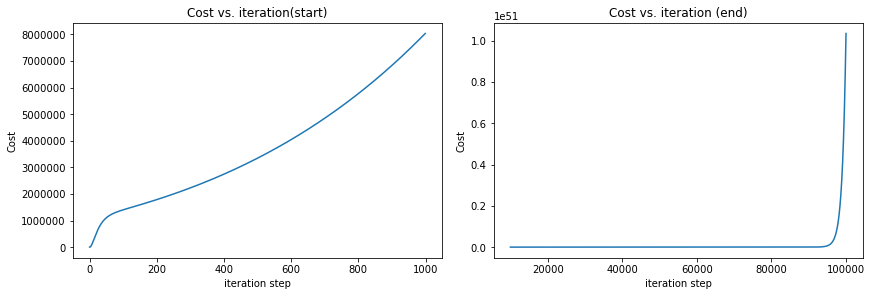

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(10000 + np.arange(len(J_hist[10000:])), J_hist[10000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [20]:
print(f"BMI=30.5 diabetes progression prediction {w_final*30.5 + b_final:0.1f}")
print(f"BMI=22.6 diabetes progression prediction {w_final*22.6 + b_final:0.1f}")

BMI=30.5 diabetes progression prediction 50720450487979083841929216.0
BMI=22.6 diabetes progression prediction 37567259297315500280774656.0


### Increased Learning Rate

In the lecture, there was a discussion related to the proper value of the learning rate, $\alpha$ in equation(3). The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

Let's try increasing the value of  $\alpha$ and see what happens:

In [23]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 5.0e-3

# call gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)


Iteration    0: Cost 5.28e+04  dj_dw: -3.234e+03, dj_db: -1.130e+02   w:  1.617e+01, b: 5.65000e-01
Iteration    1: Cost 2.11e+05  dj_dw: -2.377e+03, dj_db: -8.166e+01   w:  2.805e+01, b: 9.73310e-01
Iteration    2: Cost 3.96e+05  dj_dw: -1.752e+03, dj_db: -5.882e+01   w:  3.681e+01, b: 1.26739e+00
Iteration    3: Cost 5.70e+05  dj_dw: -1.297e+03, dj_db: -4.216e+01   w:  4.329e+01, b: 1.47819e+00
Iteration    4: Cost 7.20e+05  dj_dw: -9.647e+02, dj_db: -3.002e+01   w:  4.812e+01, b: 1.62828e+00
Iteration    5: Cost 8.44e+05  dj_dw: -7.229e+02, dj_db: -2.116e+01   w:  5.173e+01, b: 1.73410e+00
Iteration    6: Cost 9.44e+05  dj_dw: -5.466e+02, dj_db: -1.471e+01   w:  5.446e+01, b: 1.80764e+00
Iteration    7: Cost 1.02e+06  dj_dw: -4.182e+02, dj_db: -1.000e+01   w:  5.655e+01, b: 1.85765e+00
Iteration    8: Cost 1.09e+06  dj_dw: -3.246e+02, dj_db: -6.567e+00   w:  5.818e+01, b: 1.89048e+00
Iteration    9: Cost 1.14e+06  dj_dw: -2.565e+02, dj_db: -4.062e+00   w:  5.946e+01, b: 1.91080e+00


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
